In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as ssn
import os

#For data preparation and preprocessing
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For model creation and training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#For model evaluation
from sklearn.metrics import confusion_matrix

In [2]:
file_path =  r'C:\Users\Lenovo\Downloads\archive (18)\Car-Bike-Dataset'

In [4]:
import splitfolders

splitfolders.ratio(file_path, output="./new",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 4000 files [00:38, 102.60 files/s]


In [5]:
TRAIN_DIR = './new/train'
VAL_DIR = './new/val'
TEST_DIR = './new/test'

In [6]:
BATCH_SIZE = 32
IMG_SIZE = 128

In [7]:
train_gen = ImageDataGenerator(rescale=1.0/255.0, 
                              zoom_range=[0.5,1.0], 
                              brightness_range=[0.2,1.0],
                              rotation_range = 90,
                              width_shift_range = 0.1,
                              horizontal_flip = True,
                              vertical_flip = True)

val_gen   = ImageDataGenerator(rescale=1.0/255.0)
test_gen  = ImageDataGenerator(rescale=1.0/255.0)

# Load and iterate training dataset
train_ds = train_gen.flow_from_directory(TRAIN_DIR, class_mode='binary', color_mode ="rgb",target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
# Load and iterate validation dataset
val_ds = val_gen.flow_from_directory(VAL_DIR, class_mode='binary',color_mode ="rgb", target_size=(IMG_SIZE, IMG_SIZE),batch_size=32)
# Load and iterate test dataset
test_ds = test_gen.flow_from_directory(TEST_DIR, class_mode='binary',color_mode ="rgb",target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,  activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, validation_data=val_ds, epochs = 20, steps_per_epoch = 75)

Epoch 1/20
 5/75 [=>............................] - ETA: 1:53 - loss: 0.7947 - accuracy: 0.4812

C:\Users\Lenovo\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 [==============================] - 144s 2s/step - loss: 0.6873 - accuracy: 0.5612 - val_loss: 0.6680 - val_accuracy: 0.6225
Epoch 2/20
75/75 [==============================] - 158s 2s/step - loss: 0.6351 - accuracy: 0.6596 - val_loss: 0.5550 - val_accuracy: 0.7300
Epoch 3/20
75/75 [==============================] - 159s 2s/step - loss: 0.5890 - accuracy: 0.7017 - val_loss: 0.8719 - val_accuracy: 0.5950
Epoch 4/20
75/75 [==============================] - 140s 2s/step - loss: 0.5543 - accuracy: 0.7229 - val_loss: 0.5950 - val_accuracy: 0.6775
Epoch 5/20
75/75 [==============================] - 137s 2s/step - loss: 0.5459 - accuracy: 0.7287 - val_loss: 0.5213 - val_accuracy: 0.7525
Epoch 6/20
75/75 [==============================] - 141s 2s/step - loss: 0.5423 - accuracy: 0.7375 - val_loss: 0.5729 - val_accuracy: 0.7075
Epoch 7/20
75/75 [==============================] - 138s 2s/step - loss: 0.5033 - accuracy: 0.7583 - val_loss: 0.4766 - val_accuracy: 0.7825
Epoch 8/20
75/75 [======

In [15]:
pred = model.predict(test_ds)
thresh = 0.5
classes_x = [1 if p >= thresh else 0 for p in pred]

13/13 [==============================] - 9s 660ms/step


In [18]:
classes_x

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [16]:
train_ds.labels

array([0, 0, 0, ..., 1, 1, 1])

<AxesSubplot:>

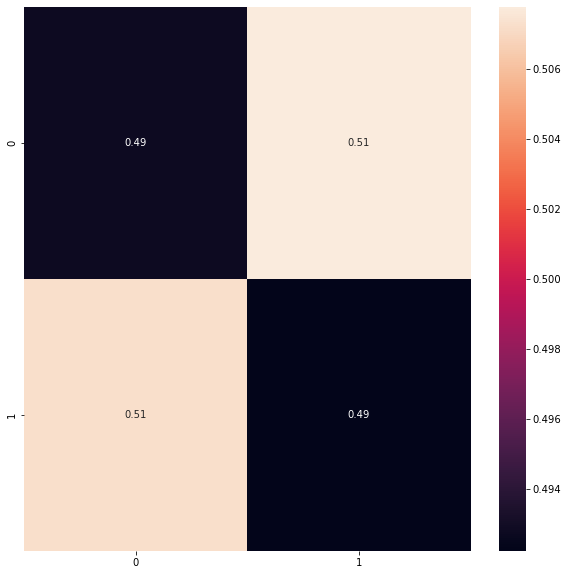

In [17]:
cm = confusion_matrix(test_ds.labels, classes_x, normalize='pred')
plt.figure(figsize = (10, 10))
ssn.heatmap(cm, annot = True)

In [19]:
3200/32

100.0